# ocaml-alloc-stats notebook

This notebook allows you to read a ".ctf" common trace format file containing a memtrace trace
of allocations from which you can plot some histograms, and perform some simple statistical analysis.

Sample ctf files are uploaded to a shared google drive folder here: https://drive.google.com/drive/folders/1ce5LJ7vEgnaPVgtgUeJ23jHG9vp4K50k?usp=share_link

In the cell below you can specify the ctf file you wish to work with. The file `irmin-replay/irmin-replay.ctf` should be present in the git repo and serves as a good example.


In [3]:
ctf_file = "irmin-replay/irmin-replay.ctf"

Check that the ocaml executable is present.

In [7]:
# from https://data36.com/plot-histogram-python-pandas/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import csv # reading CSV format trace files
import subprocess # for calling ocaml executables
import math 
import os.path

executable_name = "./translate_with_promote_lookahead.exe"

# check that the executable we rely on is present
def check_executable_exists():
    return os.path.exists(executable_name)

assert check_executable_exists()

Run the executable, store results in a temporary file, and return the name of the temporary file. An alternative would be to read the .ctf directly in python, but according to 
https://babeltrace.org/docs/v2.0/python/bt2/ the python API is undocumented (although 
probably not too hard to figure out if the current approach is deemed too ugly).

In [11]:
def convert_ctf_to_dump(filename):
    outfile_s = "tmp.ctf.dump"
    subprocess.run([executable_name,ctf_file,outfile_s],check=True)    
    return outfile_s

ctf_dump_file = convert_ctf_to_dump(ctf_file)
print("NOTE converted ctf placed in file "+ctf_dump_file)

max_obj_id:10606; a:9880 A:727 (tot:10607 read_allocs:10607) P:727 (read_promotes:727) c:9879 C:727 (tot:10606 read_collects:10606) 
NOTE converted ctf placed in file tmp.ctf.dump


In [13]:
globals = {} # a dictionary of intermediate values which we extend as we go

In [14]:
# now we can read the file as plain csv

def read_ctf_as_list(fn):
    xs = []
    with open(ctf_dump_file) as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        for row in reader:
            #print(', '.join(row))            
            entry_type = row[0]
            if (entry_type == 'a' or entry_type == 'A'):
                sz = int(row[2])
                xs.append(int(sz))
    return xs

xs = read_ctf_as_list(ctf_dump_file)

xs


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 10: invalid start byte

In [54]:
def group_allocs_by_size(list_of_allocs):
    # maintain a dict, mapping allocation size to number of allocs
    allocs = dict()
    # and a simple list of alloc sizes
    for sz in list_of_allocs:
        if sz in allocs:
            allocs[sz] = allocs[sz]+1
        else:
            allocs[sz] = 1
    return allocs

allocs = group_allocs_by_size(xs)

allocs

{376181: 1,
 4: 2191,
 12: 9,
 5: 1383,
 2: 2826,
 1: 1188,
 8: 1191,
 7: 188,
 3: 621,
 6: 401,
 9: 199,
 11: 67,
 10: 93,
 32: 133,
 14: 22,
 15: 61,
 16: 6,
 13: 10,
 125004: 1,
 380: 1,
 6250: 1,
 1379: 1,
 28: 3,
 923: 1,
 677: 1,
 1751: 1,
 18401: 1,
 2116: 1,
 20: 1,
 17: 1,
 1145: 1,
 39: 1,
 8193: 1}

In [55]:
ys = np.array(list(allocs.items()))
ys

array([[376181,      1],
       [     4,   2191],
       [    12,      9],
       [     5,   1383],
       [     2,   2826],
       [     1,   1188],
       [     8,   1191],
       [     7,    188],
       [     3,    621],
       [     6,    401],
       [     9,    199],
       [    11,     67],
       [    10,     93],
       [    32,    133],
       [    14,     22],
       [    15,     61],
       [    16,      6],
       [    13,     10],
       [125004,      1],
       [   380,      1],
       [  6250,      1],
       [  1379,      1],
       [    28,      3],
       [   923,      1],
       [   677,      1],
       [  1751,      1],
       [ 18401,      1],
       [  2116,      1],
       [    20,      1],
       [    17,      1],
       [  1145,      1],
       [    39,      1],
       [  8193,      1]])

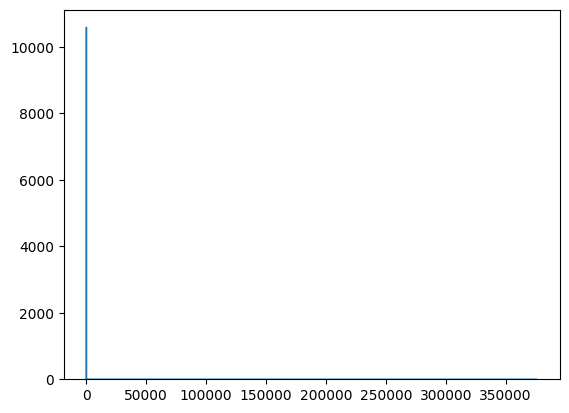

In [56]:
x = xs
counts, bins = np.histogram(x,1000)
plt.stairs(counts,bins)

In [57]:
counts

array([10595,     2,     1,     2,     1,     1,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     1,     0,
           0,     0,     0,     1,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [58]:
bins

array([1.0000000e+00, 3.7718000e+02, 7.5336000e+02, ..., 3.7542864e+05,
       3.7580482e+05, 3.7618100e+05])

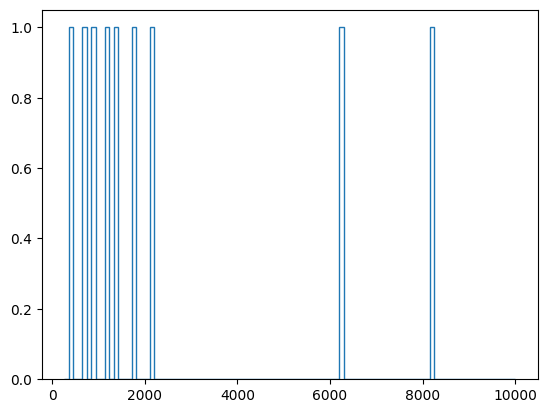

In [95]:
x=xs
counts, bins = np.histogram(x,range=(257,10000),bins=100)
plt.stairs(counts,bins)

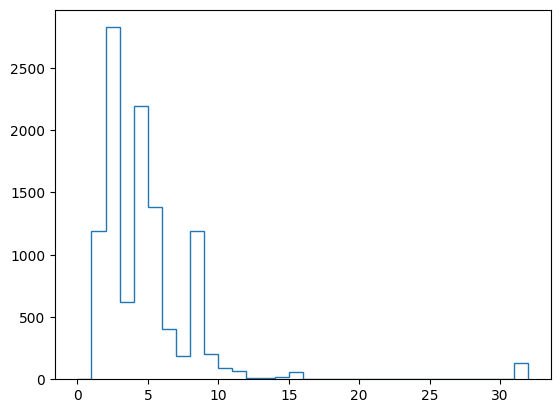

In [99]:
counts, bins = np.histogram(x,range=(0,32),bins=32)
plt.stairs(counts,bins)

In [60]:
# sum allocs.items; split into "small" vs "large" allocs
def compute_ratio_small_large(max_small_sz,allocs_grouped_by_size):
    allocs = allocs_grouped_by_size
    def is_small(sz): return sz <= max_small_sz
    total_small_allocs = sum([ v for (k,v) in allocs.items() if is_small(k) ])
    total_large_allocs = sum([ v for (k,v) in allocs.items() if not is_small(k) ])
    percentage_large = 100.0 * total_large_allocs / (total_small_allocs+total_large_allocs)
    total = total_small_allocs+total_large_allocs
    return { "total_small_allocs":total_small_allocs,
            "total_large_allocs": total_large_allocs,
            "total":total,
           "percentage_large": percentage_large}

x = compute_ratio_small_large(256,allocs)

print("Percentage large allocs of total: ", x["percentage_large"] , "(total is "+str(x["total"])+")")



Percentage large allocs of total:  0.1131328368058829 (total is 10607)


# Calculation of some basic statistics

We calculate the mean and standard deviation for allocs grouped by size.


In [66]:
# allocs_grouped_by_size should be a map from sz -> count, where count is
# the number of allocations of the given size
def compute_stats(allocs_grouped_by_size):
    allocs = allocs_grouped_by_size
    total_count = sum([count_sz for (sz,count_sz) in allocs.items()])
    mean = sum([ sz*count_sz for (sz,count_sz) in allocs.items()]) / total_count
    variance = sum( [count_sz * (sz - mean)**2 for (sz,count_sz) in allocs.items()] ) / total_count
    standard_deviation = math.sqrt(variance) # NOTE sample standard deviation
    max_ = max([ sz for (sz,_) in allocs.items()])
    return { "total_count":total_count, 
           "mean":mean,
           "variance":variance,
            "standard_deviation": standard_deviation,
           "max":max_}
    
def test():
    # https://en.wikipedia.org/wiki/Standard_deviation
    xs = { 2:1, 4:3, 5:2, 7:1, 9:1 }
    print(compute_stats(xs))
    # {'total_count': 8, 'mean': 5.0, 'variance': 4.0}, which matches wikipedia
    
# test()
    

In [67]:
print(compute_stats(allocs))

# irmin-replay.ctf: {'total_count': 10607, 'mean': 55.573017818421796, 'variance': 14854602.271443171, 'standard_deviation': 3854.1668712502797, 'max': 376181}

{'total_count': 10607, 'mean': 55.573017818421796, 'variance': 14854602.271443171, 'standard_deviation': 3854.1668712502797, 'max': 376181}


# Calculation of stats for segments of the trace

We want to check that the stats are roughly similar for different parts of the trace. For example, are the stats for the first half of the trace similar to those of the second? Essentially we are trying to identify if there are points in the trace where the allocation behaviour changes, see e.g. https://en.wikipedia.org/wiki/Change_detection. There are of course many many ways one might try to decide whether there is a change in allocation behaviour. Comparing stats is one very simple approach.

In [70]:
# divide a list of allocations into n parts, and compute statistics for each part
def compute_stats_for_sublists(allocs,n):
    len_part = int(math.ceil(len(allocs)/n))
    parts = [ allocs[i:i+len_part] for i in range(0,len(allocs),len_part) ]
    grouped = [ group_allocs_by_size(part) for part in parts]
    stats = [ compute_stats(group) for group in grouped]
    return stats # array of stats

compute_stats_for_sublists(xs,2)

#  irmin-replay.ctf: [{'total_count': 5304,
#   'mean': 101.08503016591251,
#   'variance': 29624082.626065496,
#   'standard_deviation': 5442.800990856224,
#   'max': 376181},
#  {'total_count': 5303,
#   'mean': 10.052423156703753,
#   'variance': 78192.9404914883,
#   'standard_deviation': 279.6300064218579,
#   'max': 18401}]
# i.e. standard deviations differ considerably, due to the presence of a single large allocation initially (?)

[{'total_count': 5304,
  'mean': 101.08503016591251,
  'variance': 29624082.626065496,
  'standard_deviation': 5442.800990856224,
  'max': 376181},
 {'total_count': 5303,
  'mean': 10.052423156703753,
  'variance': 78192.9404914883,
  'standard_deviation': 279.6300064218579,
  'max': 18401}]

In [81]:
zs = compute_stats_for_sublists(xs,10)
print("Part size: "+str(zs[0]['total_count'])) # see how large each part is

sds = [ stat['standard_deviation'] for stat in zs]
sds # look at standard deviations

# irmin-replay.ctf: [11543.252324907606,
#  3840.3145831898764,
#  3.754323793897764,
#  42.387826064224484,
#  28.508788142575277,
#  570.9815963237824,
#  4.295762146765788,
#  35.26154669094364,
#  2.3370739463509125,
#  251.6849307499095]
# NOTE the standard deviation seems hugely different in different parts of the trace

Part size: 1061


[11543.252324907606,
 3840.3145831898764,
 3.754323793897764,
 42.387826064224484,
 28.508788142575277,
 570.9815963237824,
 4.295762146765788,
 35.26154669094364,
 2.3370739463509125,
 251.6849307499095]

In [85]:
# Since the std-devs differ in different parts of the trace, we might like to 
# discard the first n and last m of the trace, and then compute the stats for the parts
# (based on the idea that there is an initial phase, a middle phase, and a final phase).

xs2 = xs[100:-100] # drop first and last 100
zs = compute_stats_for_sublists(xs2,2)
sds = [ stat['standard_deviation'] for stat in zs]
sds # look at standard deviations
# irmin-replay.ctf, 10 parts: [5.028304162882723,
#  3876.988864403568,
#  3.7522287683569746,
#  42.791689411645706,
#  28.778319842250163,
#  576.4320878081263,
#  4.333565335506148,
#  35.59466670313876,
#  2.2804319438512515,
#  2.40881558325566]
# irmin-replay.ctf, 2 parts: [1734.8937832899087, 258.5015332809147]
# NOTE so even with this hack of ignoring the first and last 100 allocs, the allocations 
# in the first half seem different from those in the second. Perhaps irmin-replay does
# allocate differently in the two parts?


[1734.8937832899087, 258.5015332809147]

In [88]:
print(xs2) # One issue is that "most" of the allocations are small, presumably short lived.
# Then the std-dev is really moved by some rare large allocations.

[4, 4, 3, 4, 8, 3, 8, 8, 4, 3, 8, 1, 4, 8, 9, 1, 4, 6, 1, 9, 4, 3, 4, 8, 4, 4, 8, 5, 9, 8, 4, 4, 4, 4, 6, 8, 1, 1, 4, 10, 6, 8, 7, 1, 4, 5, 4, 4, 3, 4, 10, 4, 8, 8, 1, 6, 8, 3, 11, 6, 5, 1, 4, 2, 8, 6, 5, 2, 5, 1, 5, 4, 4, 8, 9, 4, 8, 8, 4, 4, 4, 6, 4, 4, 8, 4, 4, 4, 8, 8, 8, 4, 9, 8, 8, 2, 8, 8, 8, 1, 8, 1, 4, 1, 8, 1, 8, 5, 1, 4, 8, 8, 8, 4, 4, 5, 6, 10, 4, 4, 8, 4, 10, 2, 1, 4, 9, 8, 4, 8, 1, 8, 4, 4, 1, 8, 9, 10, 2, 1, 6, 8, 1, 1, 4, 1, 6, 2, 4, 1, 4, 4, 6, 1, 4, 4, 6, 6, 1, 1, 1, 6, 9, 8, 8, 8, 11, 1, 4, 1, 4, 4, 4, 8, 8, 1, 1, 8, 1, 4, 2, 4, 6, 8, 4, 7, 6, 3, 1, 5, 4, 4, 4, 1, 9, 6, 8, 4, 4, 4, 4, 7, 8, 8, 9, 8, 1, 8, 4, 11, 8, 9, 8, 1, 5, 1, 8, 8, 4, 8, 4, 9, 6, 4, 4, 4, 1, 4, 1, 9, 8, 1, 6, 8, 8, 11, 4, 5, 1, 3, 8, 10, 10, 8, 2, 2, 8, 6, 4, 4, 2, 6, 3, 8, 4, 6, 1, 1, 8, 2, 8, 8, 1, 8, 1, 4, 4, 1, 4, 6, 4, 4, 1, 8, 6, 8, 5, 8, 6, 3, 9, 2, 4, 6, 6, 4, 9, 4, 5, 1, 9, 4, 1, 4, 8, 8, 10, 6, 5, 4, 1, 5, 2, 4, 9, 8, 7, 10, 4, 8, 2, 8, 4, 11, 3, 5, 3, 4, 4, 7, 5, 4, 4, 3, 5, 1, 4, 4, 1

In [91]:
xs3 = [ alloc for alloc in xs2 if alloc > 256] # allocs > 256 words
xs3 # [125004, 380, 6250, 1379, 923, 677, 1751, 18401, 2116, 1145]
compute_stats_for_sublists(xs3,2)
# irmin-replay.ctf: [{'total_count': 5,
#   'mean': 26787.2,
#   'variance': 2416038013.3599997,
#   'standard_deviation': 49153.2095936776,
#   'max': 125004},
#  {'total_count': 5,
#   'mean': 4818.0,
#   'variance': 46368798.4,
#   'standard_deviation': 6809.463884917814,
#   'max': 18401}]

[{'total_count': 5,
  'mean': 26787.2,
  'variance': 2416038013.3599997,
  'standard_deviation': 49153.2095936776,
  'max': 125004},
 {'total_count': 5,
  'mean': 4818.0,
  'variance': 46368798.4,
  'standard_deviation': 6809.463884917814,
  'max': 18401}]

In [93]:
# One thing we could do is count the number of "large" allocs in each part of the trace
# allocs is a list of allocation sizes; n is the number of parts 
# NOTE this ignores the actual size of each large allocation, and similarly treats all
# small allocations as equals
def count_large_allocs(allocs,n):
    len_part = int(math.ceil(len(allocs)/n))
    parts = [ allocs[i:i+len_part] for i in range(0,len(allocs),len_part) ]
    counts = [ len([x for x in part if x > 256]) for part in parts]
    return counts

count_large_allocs(xs,10)
# irmin-replay.ctf, parts = 10: [1, 3, 0, 1, 1, 4, 0, 1, 0, 1]
# It tells us something (6th part of trace has 4 large allocations!), but it would be nice
# to have a 2-phase trace, where allocation behaviour changed, and see if this approach 
# gives us a sensible signal
    

[1, 3, 0, 1, 1, 4, 0, 1, 0, 1]